IMPORTS

In [6]:
import numpy as np
import matplotlib.pyplot as plt
#import cv2
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

Wszystko oprócz R to będą slidery, albo pola tekstowe [TODO]

In [58]:
slider_l = widgets.IntSlider(min=90,max=270,step=10,value=180)
slider_alpha = widgets.FloatSlider(min=0,max=1,step=0.01,value=0.5)
slider_detectors = widgets.IntSlider(min=10,max=400,step=10,value=200)

display(slider_l,"Ustaw wartość L")
display(slider_alpha,"Ustaw wartość alpha")
display(slider_detectors,"Ustaw ilość detektorów")

NUMBER_OF_EMITERS = int(360/0.5)


im = cv2.imread("Kropka.jpg", 0)

R = min(im.shape)/2

print(R)

IntSlider(value=180, max=270, min=90, step=10)

'Ustaw wartość L'

FloatSlider(value=0.5, max=1.0, step=0.01)

'Ustaw wartość alpha'

IntSlider(value=200, max=400, min=10, step=10)

'Ustaw ilość detektorów'

NameError: name 'cv2' is not defined

In [41]:
print(get_alpha,detectors,L)

90 10 0


algorytm Bresenhama [DO OPTYMALIZACJI (TFU)]

In [3]:
def bresenhamLine(x1, y1, x2, y2):
    d,dx,dy,ai,bi,xi,yi = (0,)*7
    x,y = x1,y1
   
    coords = [(x1,y1)]
   
    xdif = x2 - x1
    ydif = y2 - y1
    ddif = dx - dy
   
    if(xdif>0):
        xi = 1
    else:
        xi = -1
        xdif = -xdif
       
    if(ydif>0):
        yi = 1
    else:    
        yi = -1
        ydif = -ydif
   
    if(ddif > 0):
        ai = -ddif *2
        bi = dy*2
        d = -dx+bi
        while(x != x2):
            if(d >= 0):
                x += xi
                y += yi
                d += ai
            else:
                d += bi
                x += xi
            coords.append((x,y))
    else
        ai = ddif*2
        bi = dx*2
        d = -dy+bi
        while (y != y2):
            if (d >=0):
                x += xi
                y += yi
                d += ai
            else:
                d += bi
                y += yi
            coords.append((x, y))
    coords.append((x2,y2))
 
       
    return coords

Te dwie komórki niżej są wprost ze wzoru http://www.cs.put.poznan.pl/swilk/pmwiki/uploads/Dydaktyka/tomograf-wzory.pdf

\+ jest wyśrodkowane czyli +R na x i y, bo OpenCV tak bierze coordy:

0,0 - - - ->X<br>
|<br>
|<br>
|<br>
v<br>
Y<br>

In [4]:
def getEmiterPosition(r, alpha):
    x = r * np.cos( np.radians(alpha)) + R
    y = r * np.sin( np.radians(alpha)) + R
    return (int(x),int(y))

In [5]:
def getSensorPosition(r, alpha, fi, i, numberOfSensors):
    x = r * np.cos (np.radians(alpha) + np.pi - np.radians(fi)/2 + (i * ( np.radians(fi) / (numberOfSensors-1) )) ) + R
    y = r * np.sin (np.radians(alpha) + np.pi - np.radians(fi)/2 + (i * ( np.radians(fi) / (numberOfSensors-1) )) ) + R
    return (int(x),int(y))

def getAllSensors(r, alpha, fi, numberOfSensors):
    sensors = []
    for i in range(numberOfSensors):
        sensors.append(getSensorPosition(r, alpha, fi, i, numberOfSensors))
    return sensors

In [6]:
"""
Sinogram X -> sensor
         Y -> emiter
         
         To jest zrobione addytywnie, ale nie wiem czy to dobrze działa, trzeba sprawdzić
"""

def sinogram(r, fi, image):
    
    sinogram = np.zeros([DETECTORS,NUMBER_OF_EMITERS])
    
    
    for i in range(NUMBER_OF_EMITERS):
        emiter = getEmiterPosition(r, ALPHA * i)
        sensors = getAllSensors(r, ALPHA * i, L, DETECTORS)
        for j,sensor in enumerate(sensors):
            misc = 0
            coords = bresenhamLine(emiter[0],emiter[1],sensor[0],sensor[1])
            for coord in  coords:
                misc += image[coord[0]-1][coord[1]-1]
            misc = misc/len(coords)
            sinogram[j][i] += misc
    sinogram = (sinogram - np.amin(sinogram)) / (np.amax(sinogram) - np.amin(sinogram))
    plt.imshow(sinogram, cmap='gray')
    return sinogram
    

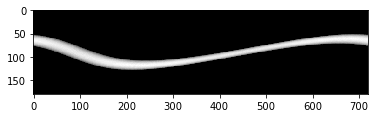

In [7]:
Sin = sinogram(R, L, im)

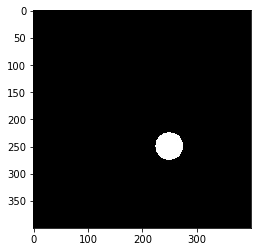

In [8]:
plt.imshow(im, cmap='gray')

In [9]:
def reverseSinogram(r, fi, sinogram):
    revSin = np.zeros([im.shape[0], im.shape[1]])
    for i in range(NUMBER_OF_EMITERS):
        emiter = getEmiterPosition(r, ALPHA * i)
        sensors = getAllSensors(r, ALPHA * i, L, DETECTORS)
        for j,sensor in enumerate(sensors):
            misc = 0
            coords = bresenhamLine(emiter[0],emiter[1],sensor[0],sensor[1])
            for coord in  coords:
                revSin[coord[0]-1][coord[1]-1] += sinogram[j][i]
    #revSin = (revSin - np.amin(revSin)) / (np.amax(revSin) - np.amin(revSin))
    plt.imshow(revSin, cmap='gray')

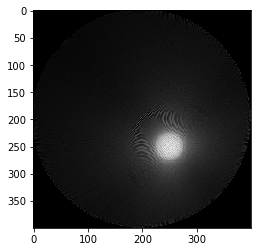

In [10]:
reverseSinogram(R, L, Sin)